Problem statement :  In this business case we need to create a Recommender System to show personalized movie recommendations based on ratings given by a user and other users similar to them in order to improve user experience. 
Byy making use of the Ratings, Users and Movies dataset we need to build a recommender system which can recommend movies based on the various charateristics of users like moving rating by them, age, gender etc. Also, item to item(in our case movies) will also be used to find the right movies to recommend to the users.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
ratings = pd.read_csv('C:/DSML/Case study/Zee Recommender systems/zee-ratings.csv')

In [3]:
users = pd.read_csv('C:/DSML/Case study/Zee Recommender systems/zee-users.csv')

In [4]:
movies = pd.read_csv('C:/DSML/Case study/Zee Recommender systems/zee-movies.csv')

# Define Problem Statement and Formatting the Data

# Formatting the data files to bring them into a workable format

In [5]:
ratings.rename(columns = {'UserID::MovieID::Rating::Timestamp':'text'}, inplace = True)
ratings[['UserID','MovieID','Rating','Timestamp']] = ratings.text.str.split("::",expand=True)
ratings.drop(['text'],axis=1,inplace=True)

In [6]:
ratings

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [7]:
users.rename(columns = {'UserID::Gender::Age::Occupation::Zip-code':'text'}, inplace = True)
users[['UserID','Gender','Age','Occupation','Zip-code']] = users.text.str.split("::",expand=True)
users.drop(['text'],axis=1,inplace=True)

In [8]:
users

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [9]:
movies.rename(columns = {'MovieID::Title::Genres':'text'}, inplace = True)
movies["text1"].fillna("", inplace = True)
movies["text2"].fillna("", inplace = True)
movies['text3'] = movies['Movie ID::Title::Genres'] + '' + movies['text1'] + '' + movies['text2'].astype(str)
movies.drop(['Movie ID::Title::Genres','text1','text2'],axis=1,inplace=True)
movies[['MovieID','Title','Genres']] = movies.text3.str.split("::",expand=True)
movies.drop(['text3'],axis=1,inplace=True)

In [10]:
movies

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


# Merging the data files and creating a single consolidated dataframe

In [11]:
ratings_movies = pd.merge(ratings, movies, on = "MovieID", how = "inner") 

In [12]:
ratings_movies

,UserID,MovieID,Rating,Timestamp,Title,Genres
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...
1000204,5949,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,2845,1,958153068,White Boys (1999),Drama
1000207,5851,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [13]:
ratings_movies_users = pd.merge(ratings_movies, users, on = "UserID", how = "inner") 

In [14]:
ratings_movies_users

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067
4,1,2355,5,978824291,Bug's Life A (1998),Animation|Children's|Comedy,F,1,10,48067
...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662


# Performing EDA, Data Cleaning, and Feature Engineering

# Reviewing the shape and structure of the dataset

In [15]:
ratings_movies_users.shape

(1000209, 10)

In [16]:
ratings_movies_users.columns

Index(['UserID', 'MovieID', 'Rating', 'Timestamp', 'Title', 'Genres', 'Gender',
       'Age', 'Occupation', 'Zip-code'],
      dtype='object')

In [17]:
ratings_movies_users.dtypes

UserID        object
MovieID       object
Rating        object
Timestamp     object
Title         object
Genres        object
Gender        object
Age           object
Occupation    object
Zip-code      object
dtype: object

# Performing necessary type conversion and deriving new features

In [18]:
ratings_movies_users['UserID'] = ratings_movies_users['UserID'].astype('str')
ratings_movies_users['MovieID'] = ratings_movies_users['MovieID'].astype('str')
ratings_movies_users['Rating'] = ratings_movies_users['Rating'].astype('int')
ratings_movies_users['Title'] = ratings_movies_users['Title'].astype('str')
ratings_movies_users['Genres'] = ratings_movies_users['Genres'].astype('str')
ratings_movies_users['Age'] = ratings_movies_users['Age'].astype('int')

In [19]:
ratings_movies_users['Release year'] = ratings_movies_users['Title'].str[-5:-1]

In [20]:
ratings_movies_users

,UserID,MovieID,Rating,Timestamp,Title,Genres,Gender,Age,Occupation,Zip-code,Release year
0,1,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama,F,1,10,48067,1975
1,1,661,3,978302109,James and the Giant Peach (1996),Animation|Children's|Musical,F,1,10,48067,1996
2,1,914,3,978301968,My Fair Lady (1964),Musical|Romance,F,1,10,48067,1964
3,1,3408,4,978300275,Erin Brockovich (2000),Drama,F,1,10,48067,2000
4,1,2355,5,978824291,Bug's Life A (1998),Animation|Children's|Comedy,F,1,10,48067,1998
...,...,...,...,...,...,...,...,...,...,...,...
1000204,4211,3791,2,965319075,Footloose (1984),Drama,M,45,5,77662,1984
1000205,4211,3806,3,965319138,MacKenna's Gold (1969),Western,M,45,5,77662,1969
1000206,4211,3840,4,965319197,Pumpkinhead (1988),Horror,M,45,5,77662,1988
1000207,4211,3766,2,965319138,Missing in Action (1984),Action|War,M,45,5,77662,1984


# Visualizing the data with respect to different categories to get a better understanding of the underlying distribution

In [21]:
users['Age'] = users['Age'].astype('int')
conditions = [
    (users['Age'] == 1),
    (users['Age'] == 18),
    (users['Age'] == 25),
    (users['Age'] == 35),
    (users['Age'] == 45),
    (users['Age'] == 50),
    (users['Age'] == 56)
]

values = ['Under 18', '18-24', '25-34', '35-44', '45-49', '50-55', '56+']

users['Age'] = np.select(conditions, values)

In [22]:
users['Occupation'] = users['Occupation'].astype('int')
conditions = [
    (users['Occupation'] == 0),
    (users['Occupation'] == 1),
    (users['Occupation'] == 2),
    (users['Occupation'] == 3),
    (users['Occupation'] == 4),
    (users['Occupation'] == 5),
    (users['Occupation'] == 6),
    (users['Occupation'] == 7),
    (users['Occupation'] == 8),
    (users['Occupation'] == 9),
    (users['Occupation'] == 10),
    (users['Occupation'] == 11),
    (users['Occupation'] == 12),
    (users['Occupation'] == 13),
    (users['Occupation'] == 14),
    (users['Occupation'] == 15),
    (users['Occupation'] == 16),
    (users['Occupation'] == 17),
    (users['Occupation'] == 18),
    (users['Occupation'] == 19),
    (users['Occupation'] == 20)
]

values = ['other', 'academic/educator', 'artist', 'clerical/admin', 'college/grad student', 'customer service', 'doctor/health care', 'executive/managerial', 'farmer', 'homemaker', 'K-12 student', 'lawyer', 'programmer', 'retired', 'sales/marketing', 'scientist', 'self-employed', 'technician/engineer', 'tradesman/craftsman', 'unemployed', 'writer']

users['Occupation'] = np.select(conditions, values)

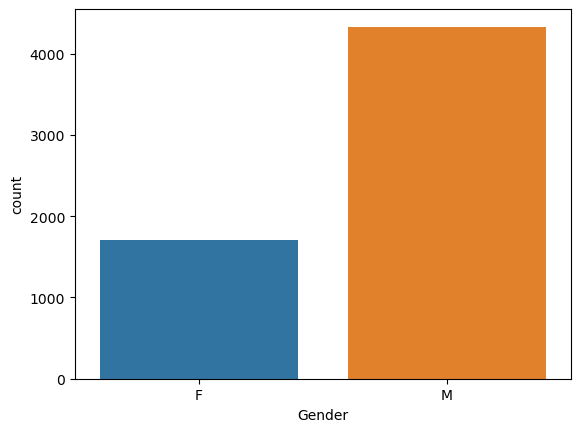

In [23]:
sns.countplot(x = 'Gender',data = users)
plt.show()

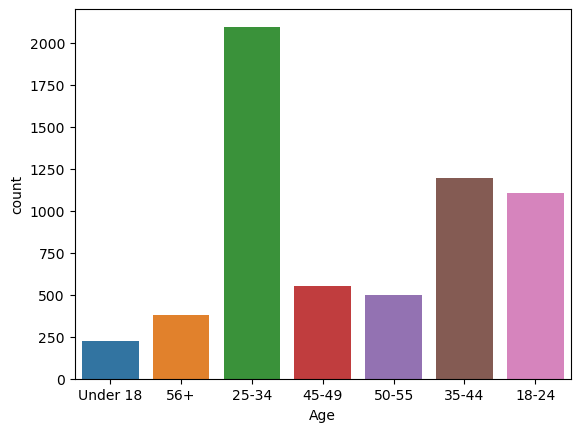

In [24]:
sns.countplot(x = 'Age',data = users)
plt.show()

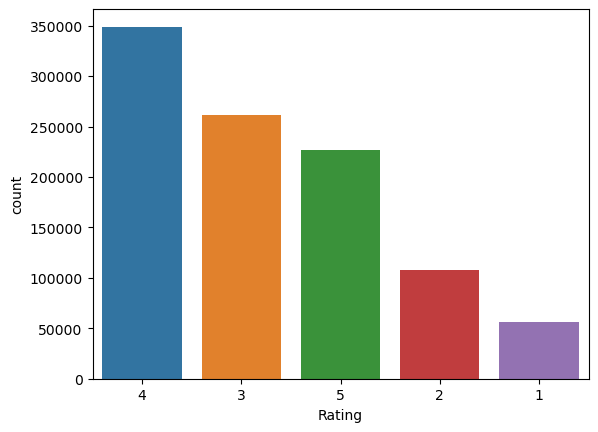

In [25]:
sns.countplot(x = 'Rating', data=ratings, order=ratings.value_counts(ratings['Rating']).index)
plt.show()

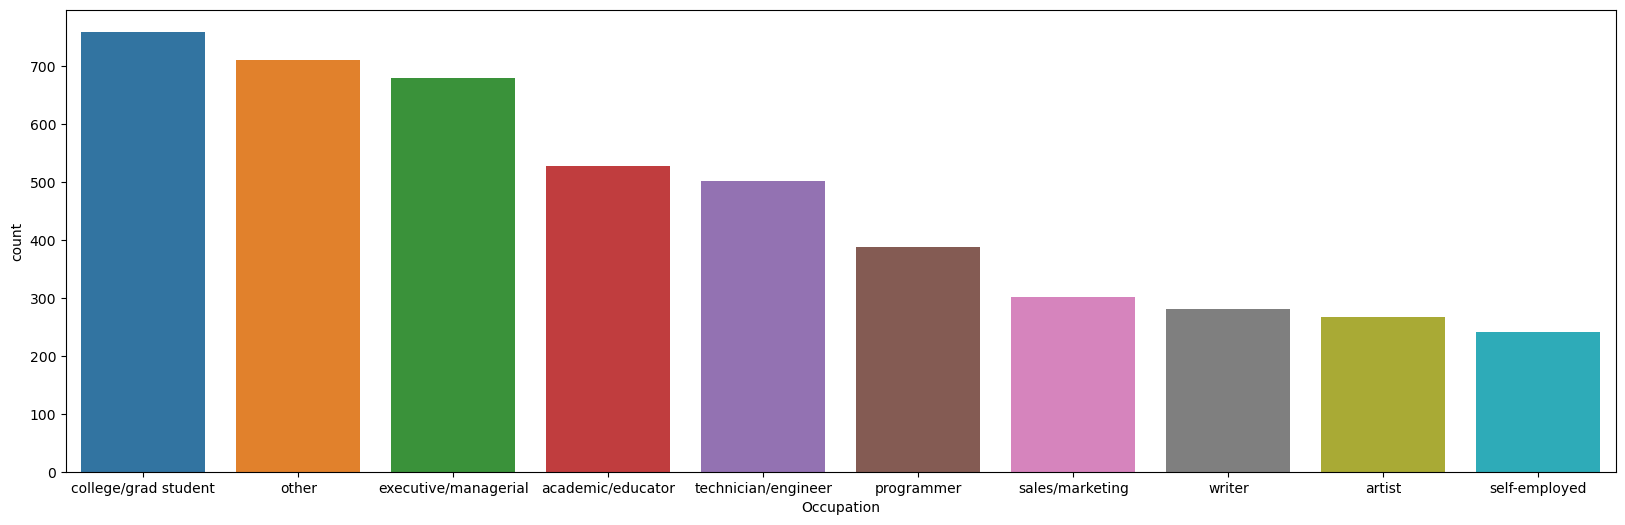

In [26]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Occupation', data=users, order=users.value_counts(users['Occupation']).iloc[:10].index)
plt.show()

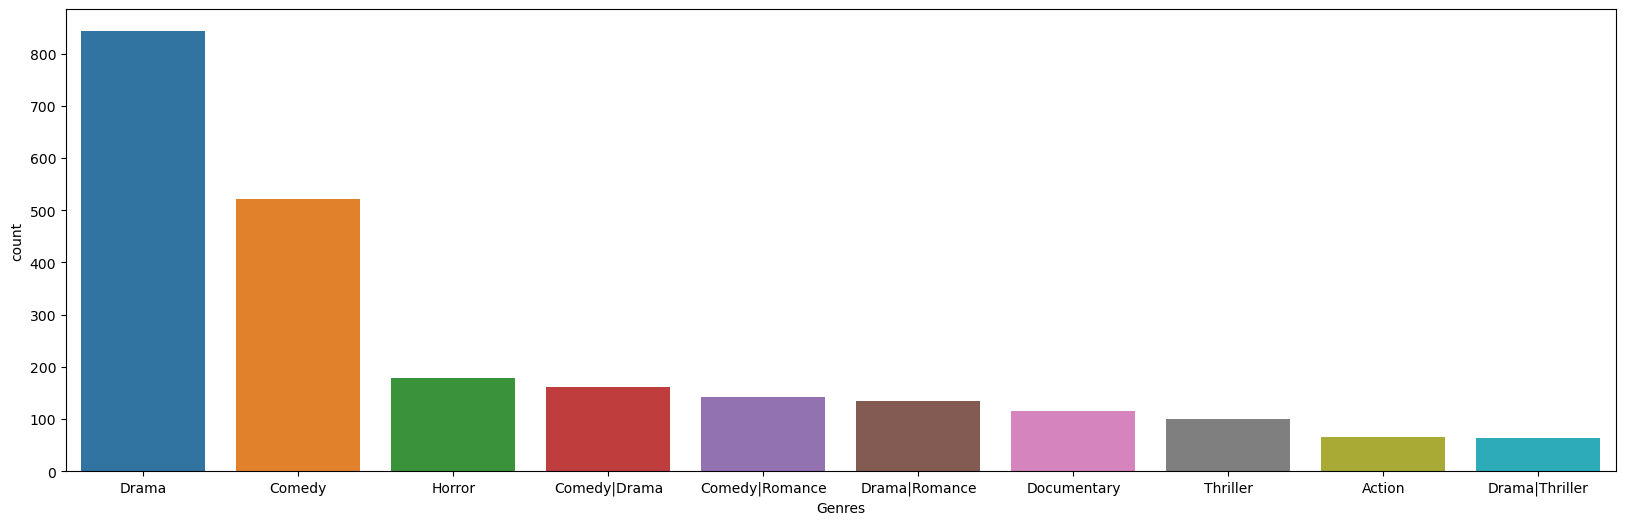

In [27]:
plt.figure(figsize=(20,6))
sns.countplot(x = 'Genres', data=movies, order=movies.value_counts(movies['Genres']).iloc[:10].index)
plt.show()

# Investigating the data for any inconsistency

In [28]:
ratings_movies_users.isna().sum()

UserID          0
MovieID         0
Rating          0
Timestamp       0
Title           0
Genres          0
Gender          0
Age             0
Occupation      0
Zip-code        0
Release year    0
dtype: int64

# Group the data according to the average rating and no. of ratings

In [29]:
movie_avg_ratings = pd.DataFrame(ratings_movies_users.groupby(['MovieID','Title'])['Rating'].mean().sort_values(ascending=False))
movie_avg_ratings.reset_index(inplace=True)
movie_avg_ratings

,MovieID,Title,Rating
0,3233,Smashing Time (1967),5.0
1,3656,Lured (1947),5.0
2,3382,Song of Freedom (1936),5.0
3,3607,One Little Indian (1973),5.0
4,1830,Follow the Bitch (1998),5.0
...,...,...,...
3701,3460,Hillbillys in a Haunted House (1967),1.0
3702,3228,Wirey Spindell (1999),1.0
3703,3493,Torso (Corpi Presentano Tracce di Violenza Car...,1.0
3704,3123,Spring Fever USA (a.k.a. Lauderdale) (1989),1.0


In [30]:
movie_no_of_ratings = pd.DataFrame(ratings_movies_users.groupby(['MovieID','Title'])['Rating'].count().sort_values(ascending=False))
movie_no_of_ratings.reset_index(inplace=True)
movie_no_of_ratings

,MovieID,Title,Rating
0,2858,American Beauty (1999),3428
1,260,Star Wars: Episode IV - A New Hope (1977),2991
2,1196,Star Wars: Episode V - The Empire Strikes Back...,2990
3,1210,Star Wars: Episode VI - Return of the Jedi (1983),2883
4,480,Jurassic Park (1993),2672
...,...,...,...
3701,865,Small Faces (1995),1
3702,641,Little Indian Big City (Un indien dans la vill...,1
3703,868,Death in Brunswick (1991),1
3704,1714,Never Met Picasso (1996),1


In [31]:
user_avg_ratings = pd.DataFrame(ratings_movies_users.groupby('UserID')['Rating'].mean().sort_values(ascending=False))
user_avg_ratings.reset_index(inplace=True)
user_avg_ratings

,UserID,Rating
0,283,4.962963
1,2339,4.956522
2,3324,4.904762
3,3902,4.890909
4,446,4.843137
...,...,...
6035,5850,1.844828
6036,4539,1.815126
6037,2744,1.304348
6038,4486,1.058824


In [32]:
user_no_of_ratings = pd.DataFrame(ratings_movies_users.groupby('UserID')['Rating'].count().sort_values(ascending=False))
user_no_of_ratings.reset_index(inplace=True)
user_no_of_ratings

,UserID,Rating
0,4169,2314
1,1680,1850
2,4277,1743
3,1941,1595
4,1181,1521
...,...,...
6035,4383,20
6036,4365,20
6037,3633,20
6038,4332,20


# Build a Recommender System based on Pearson Correlation

# Creating a pivot table of movie titles & user id and imputing the NaN values

In [33]:
m = ratings_movies_users.copy()
data_table = pd.pivot_table(m,values='Rating',columns='Title',index='UserID')
data_table.fillna(0, inplace=True)
data_table.head()

Title,$10000 Duck (1971),'Night Mother (1986),'Til There Was You (1997),'burbs The (1989),...And Justice for All (1979),1-900 (1994),10 Things I Hate About You (1999),101 Dalmatians (1961),101 Dalmatians (1996),12 Angry Men (1957),...,Young Poisoner's Handbook The (1995),Young Sherlock Holmes (1985),Young and Innocent (1937),Your Friends and Neighbors (1998),Zachariah (1971),Zed & Two Noughts A (1985),Zero Effect (1998),Zero Kelvin (Kj rlighetens kj tere) (1995),Zeus and Roxanne (1997),eXistenZ (1999)
UserID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
10,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,3.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
100,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1001,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,...,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,5.0


# Use the Item-based approach to create a simple recommender system that uses Pearson Correlation

In [34]:
def get_item_recommendations(df, item):
    return (df.corr()[item].sort_values(ascending=False))

In [35]:
movie_name = "10 Things I Hate About You (1999)"
recommendations = get_item_recommendations(data_table, movie_name)
recommendations.head(6)

Title
10 Things I Hate About You (1999)    1.000000
She's All That (1999)                0.409002
Never Been Kissed (1999)             0.400310
American Pie (1999)                  0.368416
Cruel Intentions (1999)              0.348174
Big Daddy (1999)                     0.337655
Name: 10 Things I Hate About You (1999), dtype: float64

# Build a Recommender System based on Cosine Similarity

# Print the user similarity matrix and item similarity matrix

In [36]:
users['Age'].value_counts()

25-34       2096
35-44       1193
18-24       1103
45-49        550
50-55        496
56+          380
Under 18     222
Name: Age, dtype: int64

In [37]:
users['Occupation'].value_counts()

college/grad student    759
other                   711
executive/managerial    679
academic/educator       528
technician/engineer     502
programmer              388
sales/marketing         302
writer                  281
artist                  267
self-employed           241
doctor/health care      236
K-12 student            195
clerical/admin          173
scientist               144
retired                 142
lawyer                  129
customer service        112
homemaker                92
unemployed               72
tradesman/craftsman      70
farmer                   17
Name: Occupation, dtype: int64

In [38]:
users = users.merge(user_avg_ratings, on='UserID')

In [39]:
users.rename(columns = {'Rating':'rating_mean'}, inplace = True)

In [40]:
users = users.merge(user_no_of_ratings, on='UserID')

In [41]:
users.rename(columns = {'Rating':'no_of_ratings'}, inplace = True)

In [42]:
users.drop(['Zip-code'], axis=1, inplace=True)

In [43]:
users

,UserID,Gender,Age,Occupation,rating_mean,no_of_ratings
0,1,F,Under 18,K-12 student,4.188679,53
1,2,M,56+,self-employed,3.713178,129
2,3,M,25-34,scientist,3.901961,51
3,4,M,45-49,executive/managerial,4.190476,21
4,5,M,25-34,writer,3.146465,198
...,...,...,...,...,...,...
6035,6036,F,25-34,scientist,3.302928,888
6036,6037,F,45-49,academic/educator,3.717822,202
6037,6038,F,56+,academic/educator,3.800000,20
6038,6039,F,45-49,other,3.878049,123


In [44]:
users_encoded = pd.get_dummies(users, columns=['Gender', 'Age', 'Occupation'])

In [45]:
users_encoded

,UserID,rating_mean,no_of_ratings,Gender_F,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,...,Occupation_other,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
0,1,4.188679,53,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,3.713178,129,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
2,3,3.901961,51,0,1,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,4,4.190476,21,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
4,5,3.146465,198,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,6036,3.302928,888,1,0,0,1,0,0,0,...,0,0,0,0,1,0,0,0,0,0
6036,6037,3.717822,202,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
6037,6038,3.800000,20,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6038,6039,3.878049,123,1,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0


In [46]:
from sklearn.preprocessing import StandardScaler

features = users_encoded.columns
scaler = StandardScaler()
users_encoded_scaled = scaler.fit_transform(users_encoded)
users_encoded_scaled = pd.DataFrame(users_encoded_scaled)
users_encoded_scaled.head()

,0,1,2,3,4,5,6,7,8,9,...,23,24,25,26,27,28,29,30,31,32
0,-1.731764,1.131261,-0.584221,1.591927,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
1,-1.731191,0.024380,-0.189889,-0.628170,0.628170,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,4.905328,-0.301075,-0.108283,-0.109838,-0.220892
2,-1.730617,0.463832,-0.594598,-0.628170,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
3,-1.730043,1.135444,-0.750255,-0.628170,0.628170,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
4,-1.729470,-1.294827,0.168123,-0.628170,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,4.527103


In [47]:
users_encoded_scaled.columns = users_encoded.columns

In [48]:
users_encoded_scaled

,UserID,rating_mean,no_of_ratings,Gender_F,Gender_M,Age_18-24,Age_25-34,Age_35-44,Age_45-49,Age_50-55,...,Occupation_other,Occupation_programmer,Occupation_retired,Occupation_sales/marketing,Occupation_scientist,Occupation_self-employed,Occupation_technician/engineer,Occupation_tradesman/craftsman,Occupation_unemployed,Occupation_writer
0,-1.731764,1.131261,-0.584221,1.591927,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
1,-1.731191,0.024380,-0.189889,-0.628170,0.628170,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,4.905328,-0.301075,-0.108283,-0.109838,-0.220892
2,-1.730617,0.463832,-0.594598,-0.628170,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
3,-1.730043,1.135444,-0.750255,-0.628170,0.628170,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
4,-1.729470,-1.294827,0.168123,-0.628170,0.628170,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,4.527103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6035,1.729470,-0.930609,3.748241,1.591927,-1.591927,-0.472668,1.371743,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,6.398785,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
6036,1.730043,0.035189,0.188877,1.591927,-1.591927,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
6037,1.730617,0.226486,-0.755444,1.591927,-1.591927,-0.472668,-0.728999,-0.496117,-0.316516,-0.299109,...,-0.365268,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892
6038,1.731191,0.408169,-0.221020,1.591927,-1.591927,-0.472668,-0.728999,-0.496117,3.159402,-0.299109,...,2.737714,-0.262008,-0.155164,-0.229416,-0.156280,-0.203860,-0.301075,-0.108283,-0.109838,-0.220892


# User similarity matrix using cosine similarity

In [49]:
from scipy.spatial import distance

def cosine_similarity(x,y):
    return distance.cosine(x,y)

In [50]:
user_cosine_ranks = []

# We will be using only first 100 users against all the users since there are 6040 users and it will be 
# computationally expensive
for query in users_encoded_scaled.index[:100]:
    for candidate in users_encoded_scaled.index:
        if candidate == query:
            continue
        user_cosine_ranks.append([query, candidate, cosine_similarity(users_encoded_scaled.loc[query], users_encoded_scaled.loc[candidate])])

In [51]:
users_cosine = pd.DataFrame(user_cosine_ranks, columns=['User1', 'User2', 'cosine similarity'])

In [52]:
users_cosine_pivot = pd.pivot_table(users_cosine, index='User1', columns='User2', values='cosine similarity')
users_cosine_pivot.fillna(0, inplace=True)

In [53]:
users_cosine_pivot

User2,0,1,2,3,4,5,6,7,8,9,...,6030,6031,6032,6033,6034,6035,6036,6037,6038,6039
User1,,,,,,,,,,,,,,,,,,,,,
0,0.000000,1.011996,1.006564,0.980891,1.063175,0.907933,0.974713,1.019029,1.029692,0.850941,...,0.992801,1.135547,1.095888,1.133053,1.078066,1.050334,0.997524,0.981623,0.983147,1.171332
1,1.011996,0.000000,0.965441,0.941248,0.961436,1.011802,0.941534,0.952984,0.948521,1.037023,...,1.219236,1.121555,1.076174,1.122865,1.208386,1.145198,1.187032,0.746998,1.194856,1.121687
2,1.006564,0.965441,0.000000,0.933672,0.875731,1.012026,0.929948,0.827364,0.813833,1.049822,...,1.217525,1.112972,1.074408,0.991335,1.130512,0.357321,1.192407,1.160917,1.191629,1.030344
3,0.980891,0.941248,0.933672,0.000000,1.008819,1.001451,0.845192,0.919760,0.925428,1.039136,...,1.285305,0.240232,1.086251,1.113431,1.396186,1.270402,0.823897,1.202691,0.789437,1.193858
4,1.063175,0.961436,0.875731,1.008819,0.000000,1.039413,1.028818,0.812297,0.777676,1.091653,...,1.292334,1.220045,1.120544,1.065464,1.000491,1.033494,1.245328,1.237243,1.277901,1.001165
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.884617,0.383554,0.935097,1.047731,0.915377,0.896323,1.057900,0.912094,0.898733,0.849824,...,1.003472,1.247732,1.152867,1.099420,0.873439,0.951329,1.009471,0.997540,1.008181,1.104394
96,0.863390,1.021815,1.013624,0.976244,1.100404,0.897490,0.777916,1.024626,1.047575,0.631960,...,1.005758,1.145476,1.113723,1.150779,1.128710,1.037061,0.996802,0.987017,0.979320,1.193477
97,0.831271,1.033068,1.032998,0.603300,1.081186,0.856203,0.747531,1.067069,1.072021,0.544012,...,0.988684,0.857319,1.178611,1.267909,1.057833,1.087811,1.005938,0.977819,0.992066,1.302061


# Item similarity matrix using cosine similarity

In [54]:
movies_split = movies.copy()
movies_split['Genres'] = movies_split['Genres'].str.split('|')
movies_split = movies_split.explode('Genres')
movies_split = movies_split.pivot(index='MovieID', columns='Genres', values='Title')
movies_split = ~movies_split.isna()
movies_split = movies_split.astype(int)
movies_split

Genres,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
MovieID,,,,,,,,,,,,,,,,,,
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
10,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
100,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0
1000,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1001,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
994,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
996,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1
997,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0


In [55]:
movie_cosine_ranks = []

# We will be using only first 100 movies against all the users since there are 3883 movies and it will be 
# computationally expensive
for query in movies_split.index[:100]:
    for candidate in movies_split.index:
        if candidate == query:
            continue
        movie_cosine_ranks.append([query, candidate, cosine_similarity(movies_split.loc[query], movies_split.loc[candidate])])

In [56]:
movies_cosine = pd.DataFrame(movie_cosine_ranks, columns=['Movie1', 'Movie2', 'cosine similarity'])

In [57]:
movies_cosine_pivot = pd.pivot_table(movies_cosine, index='Movie1', columns='Movie2', values='cosine similarity')
movies_cosine_pivot.fillna(0, inplace=True)

In [58]:
movies_cosine_pivot

Movie2,1,10,100,1000,1001,1002,1003,1004,1005,1006,...,99,990,991,992,993,994,996,997,998,999
Movie1,,,,,,,,,,,,,,,,,,,,,
1,0.00000,1.000000,1.000000,1.000000,0.42265,0.42265,1.000000,1.000000,0.183503,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
10,1.00000,0.000000,0.591752,1.000000,1.00000,1.00000,0.591752,0.183503,1.000000,1.000000,...,1.0,0.000000,1.0,0.422650,1.000000,1.000000,0.666667,0.591752,0.591752,1.000000
100,1.00000,0.591752,0.000000,1.000000,1.00000,1.00000,0.000000,0.500000,1.000000,0.292893,...,1.0,0.591752,0.5,0.292893,0.292893,0.292893,0.591752,0.000000,1.000000,1.000000
1000,1.00000,1.000000,1.000000,0.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.292893,0.000000
1001,0.42265,1.000000,1.000000,1.000000,0.00000,0.00000,1.000000,1.000000,0.292893,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1087,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1088,1.00000,1.000000,1.000000,1.000000,1.00000,1.00000,1.000000,1.000000,1.000000,1.000000,...,1.0,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1089,1.00000,0.591752,0.500000,0.292893,1.00000,1.00000,0.500000,0.500000,1.000000,1.000000,...,1.0,0.591752,1.0,0.292893,1.000000,1.000000,1.000000,0.500000,0.500000,0.292893


# Use the Item-based approach to create a recommender system that uses Nearest Neighbors algorithm and Cosine Similarity

In [59]:
movies_split.to_numpy()

array([[0, 0, 1, ..., 0, 0, 0],
       [1, 1, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 1, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [60]:
from sklearn.neighbors import NearestNeighbors
nbrs = NearestNeighbors(n_neighbors=5, metric='cosine').fit(movies_split)
distances, indices = nbrs.kneighbors(movies_split)

In [61]:
nn_movies = pd.DataFrame(list(zip(movies_split.index.to_list(), indices, distances)), columns=['MovieID', 'Neighbours', 'Distances'])

In [63]:
nn_movies = nn_movies.merge(movies, on='MovieID')

In [64]:
nn_movies

,MovieID,Neighbours,Distances,Title,Genres
0,1,"[3000, 1450, 1215, 72, 2845]","[0.0, 0.0, 0.0, 0.0, 0.0]",Toy Story (1995),Animation|Children's|Comedy
1,10,"[3004, 3874, 589, 3705, 3663]","[0.0, 0.0, 0.0, 0.0, 0.0]",GoldenEye (1995),Action|Adventure|Thriller
2,100,"[3480, 182, 1944, 3756, 2129]","[2.220446049250313e-16, 2.220446049250313e-16,...",City Hall (1996),Drama|Thriller
3,1000,"[343, 3574, 2575, 540, 788]","[0.0, 0.0, 0.0, 0.0, 0.0]",Curdled (1996),Crime
4,1001,"[2749, 2755, 1707, 2744, 1704]","[0.0, 0.0, 0.0, 0.0, 0.0]",Associate The (L'Associe)(1982),Comedy
...,...,...,...,...,...
3878,994,"[1268, 3119, 1267, 3127, 1270]","[0.0, 0.0, 0.0, 0.0, 0.0]",Big Night (1996),Drama
3879,996,"[3879, 418, 3132, 3347, 2646]","[0.0, 0.18350341907227397, 0.18350341907227397...",Last Man Standing (1996),Action|Drama|Western
3880,997,"[3480, 182, 1944, 3756, 2129]","[2.220446049250313e-16, 2.220446049250313e-16,...",Caught (1996),Drama|Thriller
3881,998,"[2460, 1398, 3034, 1988, 1345]","[2.220446049250313e-16, 2.220446049250313e-16,...",Set It Off (1996),Action|Crime


# Build a Recommender System based on Matrix Factorization

# Create a Recommender System using the Matrix Factorization method

In [65]:
ratings_mf = ratings.copy()
ratings_mf = pd.pivot_table(ratings_mf,values='Rating',columns='MovieID',index='UserID')
ratings_mf.fillna(0, inplace=True)

In [66]:
ratings_mf.astype(int)

MovieID,1,10,100,1000,1002,1003,1004,1005,1006,1007,...,99,990,991,992,993,994,996,997,998,999
UserID,,,,,,,,,,,,,,,,,,,,,
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
10,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
100,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1000,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1001,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,3
997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [67]:
from surprise import SVD, Dataset, Reader
from surprise.model_selection import cross_validate

In [68]:
reader = Reader(rating_scale=(1 , 5))
data = Dataset.load_from_df(ratings[['UserID', 'MovieID', 'Rating']], reader)

# Evaluate the model in terms of the Root Mean Squared Error and Mean Absolute Percentage Error

In [69]:
svd = SVD(n_factors=4)
cross_validate(svd, data, measures=['rmse','mae'], cv = 3 , return_train_measures=True,verbose=True)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.8914  0.8902  0.8894  0.8903  0.0008  
MAE (testset)     0.7040  0.7026  0.7010  0.7025  0.0013  
RMSE (trainset)   0.8614  0.8626  0.8596  0.8612  0.0012  
MAE (trainset)    0.6809  0.6813  0.6791  0.6804  0.0010  
Fit time          4.82    5.00    5.01    4.94    0.08    
Test time         4.14    3.68    4.22    4.01    0.24    


{'test_rmse': array([0.89139624, 0.89022089, 0.88942846]),
 'train_rmse': array([0.86135854, 0.86256779, 0.85955115]),
 'test_mae': array([0.70404845, 0.70262326, 0.70095994]),
 'train_mae': array([0.68086301, 0.68133346, 0.67909811]),
 'fit_time': (4.822999954223633, 4.997015714645386, 5.00758695602417),
 'test_time': (4.140318870544434, 3.684905529022217, 4.219529151916504)}

# Use embeddings for visualization and similarity-based models

In [70]:
users_embedded = svd.pu
movies_embedded = svd.pu

# User-User similarity

In [71]:
def get_cosine_ranks(embed,n, column):
    embed_ranks = []
    
    for query in range(n):
        for candidate in range(len(embed)):
            if candidate == query:
                continue
            embed_ranks.append([query+1, candidate+1, cosine_similarity(embed[query], embed[candidate])])
    return pd.DataFrame(embed_ranks, columns=column)
    
  

In [72]:
user_embed_df = get_cosine_ranks(users_embedded, 100, ['User1', 'User2', 'cosine similarity'])
user_embed_df

,User1,User2,cosine similarity
0,1,2,1.243223
1,1,3,0.425256
2,1,4,0.776194
3,1,5,1.447671
4,1,6,0.678467
...,...,...,...
603895,100,6036,0.780180
603896,100,6037,0.120388
603897,100,6038,0.973833
603898,100,6039,0.772710


In [73]:
user_embed_cosine_pivot = pd.pivot_table(user_embed_df, index='User1', columns='User2', values='cosine similarity')
user_embed_cosine_pivot.fillna(0, inplace=True)
user_embed_cosine_pivot

User2,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
User1,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.243223,0.425256,0.776194,1.447671,0.678467,0.298492,0.446175,1.032254,1.029620,...,1.299049,0.853423,1.654237,0.911135,0.356056,0.243581,0.730741,0.588648,1.428375,0.608628
2,1.243223,0.000000,0.588971,0.165648,1.694415,1.945919,0.708263,1.372365,1.450033,1.873901,...,1.839256,0.907913,1.470194,0.573013,1.324263,0.582318,1.795821,1.338647,1.630775,0.923530
3,0.425256,0.588971,0.000000,0.453705,1.529286,1.175204,0.062642,1.287568,1.746503,1.397072,...,1.646372,1.237199,1.531143,0.465307,0.483301,0.335174,1.502630,0.452168,1.642962,0.369207
4,0.776194,0.165648,0.453705,0.000000,1.911634,1.739960,0.564466,0.940996,1.188237,1.780864,...,1.909869,0.931042,1.843961,0.395941,1.261583,0.223594,1.690780,1.388077,1.938341,1.049643
5,1.447671,1.694415,1.529286,1.911634,0.000000,0.314634,1.564409,1.309969,0.848545,0.149428,...,0.050767,1.416291,0.050989,1.279466,1.018617,1.921911,0.638025,0.731978,0.172039,1.163213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.950944,1.074501,0.776784,1.375584,0.855857,0.994787,0.560325,1.338191,1.652194,1.170640,...,1.031542,0.612251,0.718488,1.609345,0.227186,1.092880,0.673376,0.269903,0.501892,0.111117
97,1.051060,1.464711,0.903754,1.431473,0.327072,0.306720,1.114174,1.411589,1.085126,0.208289,...,0.384834,1.914018,0.473853,0.549421,0.991708,1.481311,1.154359,0.602250,0.826500,1.144433
98,1.060364,0.417358,0.642596,0.721350,1.441066,1.664080,0.490152,1.318077,1.681075,1.785617,...,1.624904,0.427537,1.190465,1.337037,0.601749,0.710831,1.130378,0.747245,1.019870,0.274439


# User-User similarity

In [74]:
movie_embed_df = get_cosine_ranks(movies_embedded, 100, ['Movie1', 'Movie2', 'cosine similarity'])
movie_embed_df

,Movie1,Movie2,cosine similarity
0,1,2,1.243223
1,1,3,0.425256
2,1,4,0.776194
3,1,5,1.447671
4,1,6,0.678467
...,...,...,...
603895,100,6036,0.780180
603896,100,6037,0.120388
603897,100,6038,0.973833
603898,100,6039,0.772710


In [75]:
movie_embed_cosine_pivot = pd.pivot_table(movie_embed_df, index='Movie1', columns='Movie2', values='cosine similarity')
movie_embed_cosine_pivot.fillna(0, inplace=True)
movie_embed_cosine_pivot

Movie2,1,2,3,4,5,6,7,8,9,10,...,6031,6032,6033,6034,6035,6036,6037,6038,6039,6040
Movie1,,,,,,,,,,,,,,,,,,,,,
1,0.000000,1.243223,0.425256,0.776194,1.447671,0.678467,0.298492,0.446175,1.032254,1.029620,...,1.299049,0.853423,1.654237,0.911135,0.356056,0.243581,0.730741,0.588648,1.428375,0.608628
2,1.243223,0.000000,0.588971,0.165648,1.694415,1.945919,0.708263,1.372365,1.450033,1.873901,...,1.839256,0.907913,1.470194,0.573013,1.324263,0.582318,1.795821,1.338647,1.630775,0.923530
3,0.425256,0.588971,0.000000,0.453705,1.529286,1.175204,0.062642,1.287568,1.746503,1.397072,...,1.646372,1.237199,1.531143,0.465307,0.483301,0.335174,1.502630,0.452168,1.642962,0.369207
4,0.776194,0.165648,0.453705,0.000000,1.911634,1.739960,0.564466,0.940996,1.188237,1.780864,...,1.909869,0.931042,1.843961,0.395941,1.261583,0.223594,1.690780,1.388077,1.938341,1.049643
5,1.447671,1.694415,1.529286,1.911634,0.000000,0.314634,1.564409,1.309969,0.848545,0.149428,...,0.050767,1.416291,0.050989,1.279466,1.018617,1.921911,0.638025,0.731978,0.172039,1.163213
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,0.950944,1.074501,0.776784,1.375584,0.855857,0.994787,0.560325,1.338191,1.652194,1.170640,...,1.031542,0.612251,0.718488,1.609345,0.227186,1.092880,0.673376,0.269903,0.501892,0.111117
97,1.051060,1.464711,0.903754,1.431473,0.327072,0.306720,1.114174,1.411589,1.085126,0.208289,...,0.384834,1.914018,0.473853,0.549421,0.991708,1.481311,1.154359,0.602250,0.826500,1.144433
98,1.060364,0.417358,0.642596,0.721350,1.441066,1.664080,0.490152,1.318077,1.681075,1.785617,...,1.624904,0.427537,1.190465,1.337037,0.601749,0.710831,1.130378,0.747245,1.019870,0.274439


# Getting embeddings for d=2 and plotting the results

In [76]:
train_set = data.build_full_trainset()

In [77]:
svd2 = SVD(n_factors = 2)
svd2.fit(train_set)

In [78]:
user_svd2_ranks = get_cosine_ranks(svd2.pu, 100, ['User1', 'User2', 'cosine similarity'])
user_svd2_ranks_sample = user_svd2_ranks.sample(500)
user_svd2_ranks_sample

,User1,User2,cosine similarity
30132,5,5978,0.573356
241478,40,5959,0.083775
196817,33,3571,1.574845
132566,22,5749,0.004166
95982,16,5399,1.004008
...,...,...,...
334970,56,2827,1.981044
121890,21,1112,0.683363
435829,73,1023,0.725991
344008,57,5826,0.152927


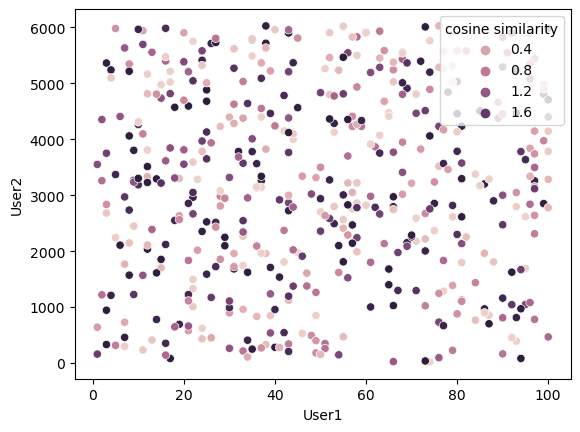

In [79]:
sns.scatterplot(x = user_svd2_ranks_sample['User1'], y = user_svd2_ranks_sample['User2'], hue=user_svd2_ranks_sample['cosine similarity'])
plt.show()

In [80]:
movie_svd2_ranks = get_cosine_ranks(svd2.qi, 100, ['Movie1', 'Movie2', 'cosine similarity'])
movie_svd2_ranks_sample = movie_svd2_ranks.sample(500)
movie_svd2_ranks_sample

,Movie1,Movie2,cosine similarity
65265,18,2282,1.960874
278889,76,1016,0.465366
94903,26,2280,1.961738
83125,23,1617,1.503325
287422,78,2139,1.463318
...,...,...,...
72629,20,2236,0.929479
197253,54,890,1.119412
258473,70,2830,0.012908
217937,59,3049,0.044304


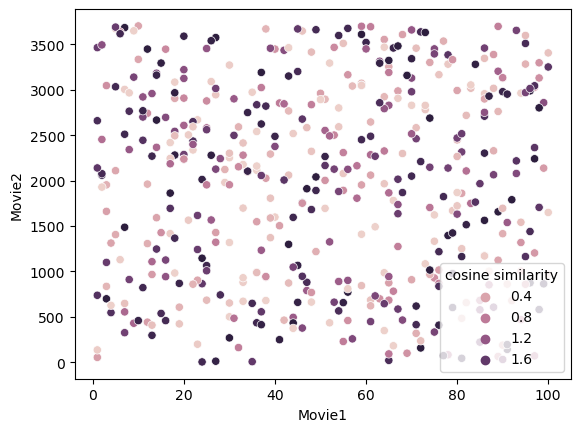

In [81]:
sns.scatterplot(x = movie_svd2_ranks_sample['Movie1'], y = movie_svd2_ranks_sample['Movie2'], hue=movie_svd2_ranks_sample['cosine similarity'])
plt.show()

# Questionnaire

In [83]:
user_ratings_ques = pd.merge(users, ratings, on = "UserID", how = "inner") 
user_ratings_movies_ques = pd.merge(user_ratings_ques, movies, on = "MovieID", how = "inner") 
user_ratings_movies_ques

,UserID,Gender,Age,Occupation,rating_mean,no_of_ratings,MovieID,Rating,Timestamp,Title,Genres
0,1,F,Under 18,K-12 student,4.188679,53,1193,5,978300760,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,M,56+,self-employed,3.713178,129,1193,5,978298413,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,M,25-34,programmer,3.826087,23,1193,4,978220179,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,M,25-34,executive/managerial,3.323383,201,1193,4,978199279,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,M,50-55,academic/educator,4.075829,211,1193,5,978158471,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18-24,technician/engineer,3.497238,181,2198,5,958846401,Modulations (1998),Documentary
1000205,5675,M,35-44,sales/marketing,3.807167,586,2703,3,976029116,Broken Vessels (1998),Drama
1000206,5780,M,18-24,technician/engineer,3.741313,259,2845,1,958153068,White Boys (1999),Drama
1000207,5851,F,18-24,writer,4.012346,162,3607,5,957756608,One Little Indian (1973),Comedy|Drama|Western


In [84]:
age_ratings_q1 = user_ratings_movies_ques.groupby(['Age']).agg({"Title":"nunique"}).reset_index().sort_values(by=['Title'],ascending=False)[:10]
age_ratings_q1

,Age,Title
1,25-34,3508
2,35-44,3447
0,18-24,3393
3,45-49,3288
4,50-55,3258
5,56+,2913
6,Under 18,2650


In [85]:
profession_ratings_q2 = user_ratings_movies_ques.groupby(['Occupation']).agg({"Title":"nunique"}).reset_index().sort_values(by=['Title'],ascending=False)[:10]
profession_ratings_q2

,Occupation,Title
11,other,3448
4,college/grad student,3363
20,writer,3330
7,executive/managerial,3269
1,academic/educator,3218
2,artist,3145
16,self-employed,3123
17,technician/engineer,3087
6,doctor/health care,3011
14,sales/marketing,2953


In [86]:
gender_ratings_q3 = user_ratings_movies_ques.groupby(['Gender']).agg({"Title":"nunique"}).reset_index().sort_values(by=['Title'],ascending=False)[:10]
gender_ratings_q3

,Gender,Title
1,M,3671
0,F,3481


In [87]:
user_ratings_movies_ques['Release year'] = user_ratings_movies_ques['Title'].str[-5:-1].astype(int)

In [88]:
years = user_ratings_movies_ques['Release year'].unique().tolist()
print(min(years))
print(max(years))

1919
2000


In [89]:
decade_bins = [1910,1920,1930,1940,1950,1960,1970,1980,1990,2000]
decades_labels = ['1910-1920','1920-1930','1930-1940', '1940-1950','1950-1960','1960-1970', '1970-1980','1980-1990','1990-2000']
user_ratings_movies_ques['Release decade'] = pd.cut(user_ratings_movies_ques['Release year'],bins=decade_bins,labels=decades_labels)

In [90]:
release_decade_q4 = user_ratings_movies_ques.groupby(['Release decade']).agg({"Title":"nunique"}).reset_index().sort_values(by=['Title'],ascending=False)[:10]
release_decade_q4

,Release decade,Title
8,1990-2000,2229
7,1980-1990,626
6,1970-1980,266
5,1960-1970,188
4,1950-1960,167
3,1940-1950,115
2,1930-1940,82
1,1920-1930,29
0,1910-1920,4


In [91]:
max_ratings_q5 = user_ratings_movies_ques.groupby(['Title']).agg({"no_of_ratings":"count"}).reset_index().sort_values(by=['no_of_ratings'],ascending=False)[:10]
max_ratings_q5

,Title,no_of_ratings
127,American Beauty (1999),3428
3153,Star Wars: Episode IV - A New Hope (1977),2991
3154,Star Wars: Episode V - The Empire Strikes Back...,2990
3155,Star Wars: Episode VI - Return of the Jedi (1983),2883
1789,Jurassic Park (1993),2672
2894,Saving Private Ryan (1998),2653
3293,Terminator 2: Judgment Day (1991),2649
2113,Matrix The (1999),2590
258,Back to the Future (1985),2583
2990,Silence of the Lambs The (1991),2578


In [92]:
user_ratings_movies_ques['Title'] = user_ratings_movies_ques['Title'].str[:-6]

In [93]:
user_ratings_movies_ques

,UserID,Gender,Age,Occupation,rating_mean,no_of_ratings,MovieID,Rating,Timestamp,Title,Genres,Release year,Release decade
0,1,F,Under 18,K-12 student,4.188679,53,1193,5,978300760,One Flew Over the Cuckoo's Nest,Drama,1975,1970-1980
1,2,M,56+,self-employed,3.713178,129,1193,5,978298413,One Flew Over the Cuckoo's Nest,Drama,1975,1970-1980
2,12,M,25-34,programmer,3.826087,23,1193,4,978220179,One Flew Over the Cuckoo's Nest,Drama,1975,1970-1980
3,15,M,25-34,executive/managerial,3.323383,201,1193,4,978199279,One Flew Over the Cuckoo's Nest,Drama,1975,1970-1980
4,17,M,50-55,academic/educator,4.075829,211,1193,5,978158471,One Flew Over the Cuckoo's Nest,Drama,1975,1970-1980
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,5949,M,18-24,technician/engineer,3.497238,181,2198,5,958846401,Modulations,Documentary,1998,1990-2000
1000205,5675,M,35-44,sales/marketing,3.807167,586,2703,3,976029116,Broken Vessels,Drama,1998,1990-2000
1000206,5780,M,18-24,technician/engineer,3.741313,259,2845,1,958153068,White Boys,Drama,1999,1990-2000
1000207,5851,F,18-24,writer,4.012346,162,3607,5,957756608,One Little Indian,Comedy|Drama|Western,1973,1970-1980


In [94]:
#Ans.

from scipy.sparse import csr_matrix
array = np.array([[1,0],[3,7]])

arr_csr = csr_matrix(array).tocsr()
for ele in arr_csr:
    print(ele)

  (0, 0)	1
  (0, 0)	3
  (0, 1)	7
